In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_length = pd.read_csv(
    "https://raw.githubusercontent.com/nurfianqodar/analisis_data_lele/main/data_panjang.csv"
)
df_width = pd.read_csv(
    "https://raw.githubusercontent.com/nurfianqodar/analisis_data_lele/main/data_lebar.csv"
)
df_weight = pd.read_csv(
    "https://raw.githubusercontent.com/nurfianqodar/analisis_data_lele/main/data_bobot.csv"
)

- TA (Treatment A) = 100% Pelet Ikan
- TB (Treatment B) = 50% Pelet Ikan + 50% Maggot Kering
- TC (Treatment C) = 100% Maggot Kering

## Analisis Data Panjang Tubuh Lele

### Model Data Review

In [3]:
df_length.sample(5)

,index,date,treatment,repetition,length_in_cm
73,73,2024-08-07,TB,R4,18.5
43,43,2024-07-31,TC,R1,14.0
120,120,2024-08-14,TA,R1,18.0
6,6,2024-07-31,TA,R2,16.0
164,164,2024-08-14,TA,R2,24.0


In [4]:
df_length["date"] = pd.to_datetime(df_length["date"])

In [5]:
df_length.columns

Index(['index', 'date', 'treatment', 'repetition', 'length_in_cm'], dtype='object')

### Ringkasan Statistik

In [6]:
grouped_length = df_length.groupby(["treatment", "date"])["length_in_cm"]
grouped_length.describe()

count    mean       std   min     25%    50%     75%  \
treatment date                                                               
TA        2024-07-31   20.0  18.400  1.846761  16.0  17.000  18.50  19.250   
          2024-08-07   20.0  18.925  2.903152  15.0  16.875  18.25  20.125   
          2024-08-14   20.0  19.150  2.777257  15.0  17.000  19.00  20.250   
TB        2024-07-31   20.0  18.450  2.480980  16.0  16.750  18.00  19.250   
          2024-08-07   20.0  20.000  2.660629  16.5  17.875  19.75  21.500   
          2024-08-14   20.0  21.300  2.975337  17.0  19.000  20.50  23.250   
TC        2024-07-31   20.0  19.650  3.528456  14.0  16.000  19.50  21.250   
          2024-08-07   20.0  19.800  2.117595  17.0  18.000  19.50  20.250   
          2024-08-14   20.0  20.750  3.544826  16.5  18.000  20.00  22.125   

                       max  
treatment date              
TA        2024-07-31  23.0  
          2024-08-07  26.0  
          2024-08-14  26.0  
TB        2024-07-31  24.0  
          2024-08-07  25.0  
          2024-08-14  27.0  
TC        2024-07-31  27.0  
          2024-08-07  25.0  
          2024-08-14  29.0

### Delta Rata-Rata Pertumbuhan Panjang Tubuh Lele 

In [7]:
weekly_avg_length = grouped_length.mean().reset_index()
weekly_avg_length = weekly_avg_length.sort_values(by=["treatment", "date"])
weekly_avg_length["delta_in_cm"] = weekly_avg_length.groupby("treatment")[
    "length_in_cm"
].diff()
weekly_avg_length.fillna({"delta_in_cm": 0}, inplace=True)
weekly_avg_length.drop(columns="length_in_cm").set_index(["treatment", "date"])

delta_in_cm
treatment date                   
TA        2024-07-31        0.000
          2024-08-07        0.525
          2024-08-14        0.225
TB        2024-07-31        0.000
          2024-08-07        1.550
          2024-08-14        1.300
TC        2024-07-31        0.000
          2024-08-07        0.150
          2024-08-14        0.950

### Grafik Pertumbuhan

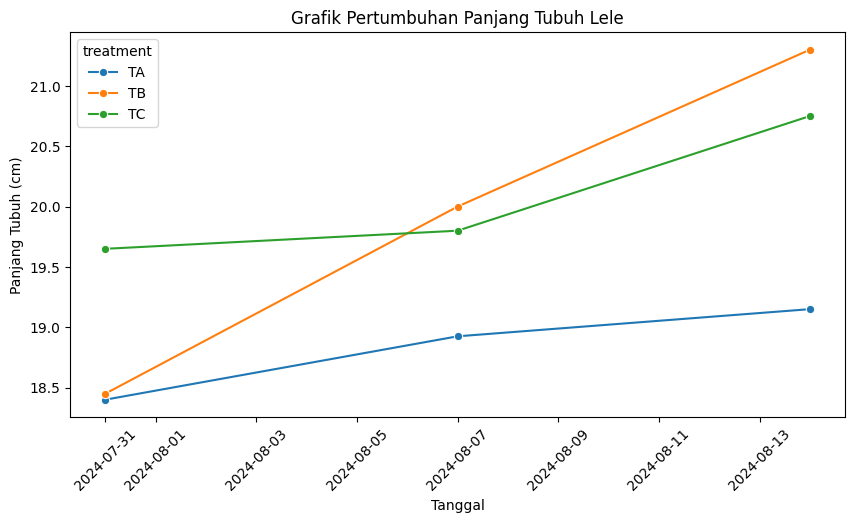

In [8]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=grouped_length.mean().reset_index(),
    x="date",
    y="length_in_cm",
    hue="treatment",
    marker="o",
)

plt.title("Grafik Pertumbuhan Panjang Tubuh Lele")
plt.xlabel("Tanggal")
plt.ylabel("Panjang Tubuh (cm)")

plt.xticks(rotation=45)

plt.show()

## Analisis Data Lebar Kepala Lele

### Data Model Review

In [9]:
df_width.sample(5)

,index,date,treatment,repetition,width_in_cm
70,70,2024-08-07,TA,R4,2.0
166,166,2024-08-14,TA,R2,2.5
117,117,2024-08-07,TB,R3,3.0
143,143,2024-08-14,TA,R3,2.0
84,84,2024-08-07,TC,R2,2.0


In [10]:
df_width["date"] = pd.to_datetime(df_width["date"])

In [11]:
df_width.shape

(180, 5)

### Ringkasan Statistik

In [12]:
grouped_width = df_width.groupby(["treatment", "date"])["width_in_cm"]
grouped_width.describe()

count   mean       std  min    25%  50%    75%  max
treatment date                                                           
TA        2024-07-31   20.0  2.700  0.656947  2.0  2.000  3.0  3.000  4.0
          2024-08-07   20.0  2.725  0.658447  2.0  2.000  3.0  3.000  4.0
          2024-08-14   20.0  2.850  0.564288  2.0  2.500  2.5  3.125  4.0
TB        2024-07-31   20.0  2.500  0.512989  2.0  2.000  2.5  3.000  3.0
          2024-08-07   20.0  3.025  0.678136  2.0  2.500  3.0  3.250  4.0
          2024-08-14   20.0  3.125  0.483273  2.5  3.000  3.0  3.500  4.0
TC        2024-07-31   20.0  2.700  0.656947  2.0  2.000  3.0  3.000  4.0
          2024-08-07   20.0  2.950  0.686333  2.0  2.375  3.0  3.500  4.0
          2024-08-14   20.0  2.950  0.426121  2.5  2.500  3.0  3.000  4.0

### Delta Rata-Rata Pertumbuhan Lebar Kepala Lele 

In [13]:
weekly_avg_width = grouped_width.mean().reset_index()
weekly_avg_width = weekly_avg_width.sort_values(by=["treatment", "date"])
weekly_avg_width["delta_in_cm"] = weekly_avg_width.groupby("treatment")[
    "width_in_cm"
].diff()
weekly_avg_width.fillna({"delta_in_cm": 0}, inplace=True)
weekly_avg_width.drop(columns=["width_in_cm"]).set_index(["treatment", "date"])

delta_in_cm
treatment date                   
TA        2024-07-31        0.000
          2024-08-07        0.025
          2024-08-14        0.125
TB        2024-07-31        0.000
          2024-08-07        0.525
          2024-08-14        0.100
TC        2024-07-31        0.000
          2024-08-07        0.250
          2024-08-14        0.000

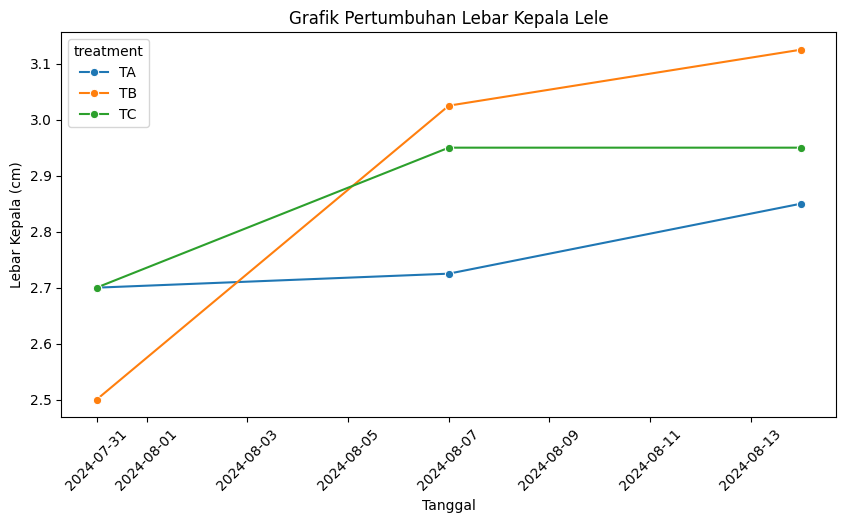

In [14]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=grouped_width.mean().reset_index(),
    x="date",
    y="width_in_cm",
    hue="treatment",
    marker="o",
)

plt.title("Grafik Pertumbuhan Lebar Kepala Lele")
plt.xlabel("Tanggal")
plt.ylabel("Lebar Kepala (cm)")

plt.xticks(rotation=45)

plt.show()

## Analisis Data Bobot

### Model Data Review

In [15]:
df_weight.sample(5)

,index,date,weight_in_gram,treatment,repetition
12,24,2024-08-14,310,TC,R3
43,43,2024-07-31,235,TB,R2
21,13,2024-08-07,220,TB,R2
16,3,2024-08-07,250,TA,R2
2,4,2024-08-14,210,TA,R3


In [16]:
df_weight["date"] = pd.to_datetime(df_weight["date"])

In [17]:
df_weight.shape

(45, 5)

### Ringkasan Statistik

In [18]:
grouped_weight = df_weight.groupby(["treatment", "date"])["weight_in_gram"]
grouped_weight.describe()

count   mean        std    min    25%    50%    75%  \
treatment date                                                              
TA        2024-07-31    5.0  194.0  59.833101  120.0  160.0  200.0  210.0   
          2024-08-07    5.0  214.0  56.833089  130.0  200.0  210.0  250.0   
          2024-08-14    5.0  282.0  53.572381  210.0  250.0  300.0  300.0   
TB        2024-07-31    5.0  243.0  29.495762  205.0  235.0  235.0  255.0   
          2024-08-07    5.0  246.0  39.115214  210.0  220.0  240.0  250.0   
          2024-08-14    5.0  258.0  68.337398  180.0  210.0  250.0  300.0   
TC        2024-07-31    5.0  216.0  39.115214  160.0  190.0  240.0  240.0   
          2024-08-07    5.0  236.0  49.295030  160.0  220.0  250.0  260.0   
          2024-08-14    5.0  314.0  23.021729  290.0  300.0  310.0  320.0   

                        max  
treatment date               
TA        2024-07-31  280.0  
          2024-08-07  280.0  
          2024-08-14  350.0  
TB        2024-07-31  285.0  
          2024-08-07  310.0  
          2024-08-14  350.0  
TC        2024-07-31  250.0  
          2024-08-07  290.0  
          2024-08-14  350.0

### Delta Rata-Rata Pertumbuhan bobot Lele 

In [19]:
weekly_avg_weight = grouped_weight.mean().reset_index()
weekly_avg_weight = weekly_avg_weight.sort_values(by=["treatment", "date"])
weekly_avg_weight["delta_in_cm"] = weekly_avg_weight.groupby("treatment")[
    "weight_in_gram"
].diff()
weekly_avg_weight.fillna({"delta_in_cm": 0}, inplace=True)
weekly_avg_weight.drop(columns="weight_in_gram").set_index(["treatment", "date"])

delta_in_cm
treatment date                   
TA        2024-07-31          0.0
          2024-08-07         20.0
          2024-08-14         68.0
TB        2024-07-31          0.0
          2024-08-07          3.0
          2024-08-14         12.0
TC        2024-07-31          0.0
          2024-08-07         20.0
          2024-08-14         78.0

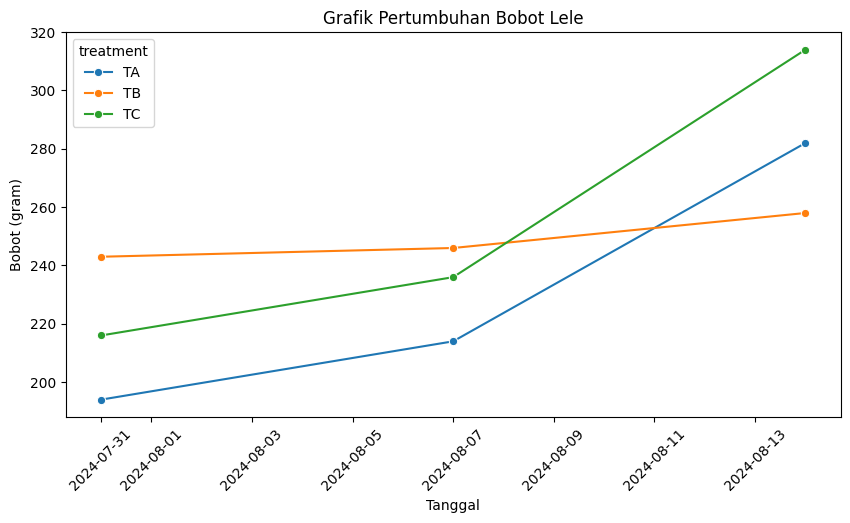

In [20]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=grouped_weight.mean().reset_index(),
    x="date",
    y="weight_in_gram",
    hue="treatment",
    marker="o",
)

plt.title("Grafik Pertumbuhan Bobot Lele")
plt.xlabel("Tanggal")
plt.ylabel("Bobot (gram)")

plt.xticks(rotation=45)

plt.show()